# Class Detecting Anomalies

In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_customers = pd.read_csv("./datasets/dados_historicos.csv")
df_customers

,transacao1,transacao2
0,12.669211,62.587129
1,32.354746,-21.460716
2,-16.493253,33.112899
3,1.042115,60.217991
4,11.959012,59.423824
...,...,...
645,372.009668,24.065374
646,399.629828,37.392594
647,391.935880,15.374113
648,382.099797,6.520470


In [3]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   transacao1  650 non-null    float64
 1   transacao2  650 non-null    float64
dtypes: float64(2)
memory usage: 10.3 KB


In [4]:
df_customers.describe()

,transacao1,transacao2
count,650.000000,650.000000
mean,195.996809,75.626776
std,164.365153,94.099071
min,-189.632622,-129.689793
25%,16.762615,4.092314
50%,198.526035,30.041190
75%,382.220206,186.598493
max,456.036150,298.963511


## Model

In [5]:
model_forest = IsolationForest()
model_forest.fit(df_customers)
df_customers["anomaly_score"] = model_forest.decision_function(df_customers)
df_customers


,transacao1,transacao2,anomaly_score
0,12.669211,62.587129,0.048598
1,32.354746,-21.460716,0.007589
2,-16.493253,33.112899,0.064638
3,1.042115,60.217991,0.052985
4,11.959012,59.423824,0.050776
...,...,...,...
645,372.009668,24.065374,0.042420
646,399.629828,37.392594,0.032360
647,391.935880,15.374113,0.081223
648,382.099797,6.520470,0.067854


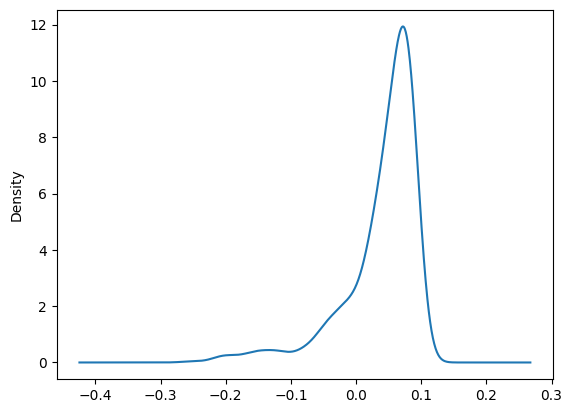

In [6]:
plt.figure()
df_customers['anomaly_score'].plot(kind='density')
plt.show()

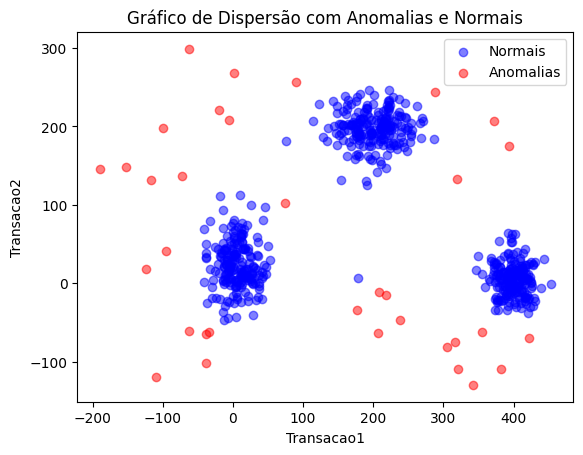

In [13]:
normal_data = df_customers[(df_customers["anomaly_score"] >= -0.062)]

anomalies_data = df_customers[~(df_customers["anomaly_score"] > -0.08)]

plt.scatter(normal_data["transacao1"], normal_data["transacao2"], color="blue", alpha=0.5, label="Normais")
plt.scatter(anomalies_data["transacao1"], anomalies_data["transacao2"], color="red", alpha=0.5, label="Anomalias")
plt.xlabel("Transacao1")
plt.ylabel("Transacao2")
plt.title("Gráfico de Dispersão com Anomalias e Normais")
plt.legend()
plt.show()

## New Customers

In [8]:
df_new_customers = pd.read_csv("./datasets/novos_dados.csv")
df_new_customers

,transacao1,transacao2
0,17.976473,5.038365
1,28.783271,37.672767
2,11.975249,-28.475939
3,15.911884,-10.197377
4,5.488446,8.752535
...,...,...
2520,-95.695457,65.316855
2521,-63.871037,2.836396
2522,-67.285177,-111.563031
2523,-146.212606,-132.583909


In [9]:
model_forest.fit(df_new_customers)
df_new_customers["anomaly_score"] = model_forest.decision_function(df_new_customers)
df_new_customers

,transacao1,transacao2,anomaly_score
0,17.976473,5.038365,0.095870
1,28.783271,37.672767,-0.049558
2,11.975249,-28.475939,0.051495
3,15.911884,-10.197377,0.087013
4,5.488446,8.752535,0.104347
...,...,...,...
2520,-95.695457,65.316855,-0.236916
2521,-63.871037,2.836396,-0.121838
2522,-67.285177,-111.563031,-0.257614
2523,-146.212606,-132.583909,-0.293317


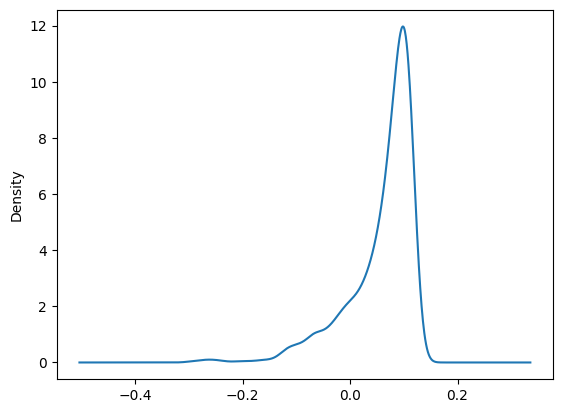

In [10]:
plt.figure()
df_new_customers['anomaly_score'].plot(kind='density')
plt.show()

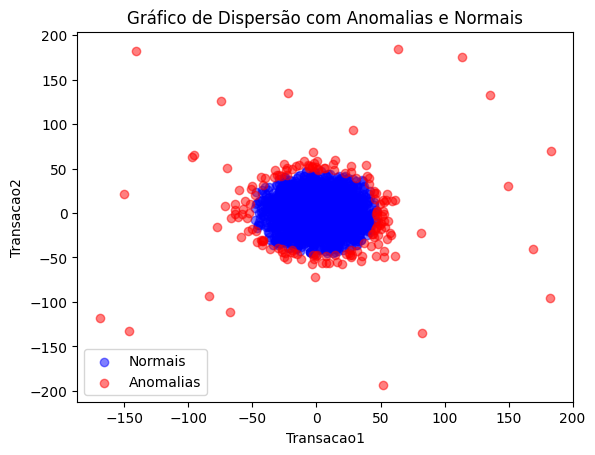

In [11]:
normal_data = df_new_customers[(df_new_customers["anomaly_score"] >= -0.06)]

anomalies_data = df_new_customers[~(df_new_customers["anomaly_score"] >= -0.06) & (df_new_customers["anomaly_score"] <= 0.07)]

plt.scatter(normal_data["transacao1"], normal_data["transacao2"], color="blue", alpha=0.5, label="Normais")
plt.scatter(anomalies_data["transacao1"], anomalies_data["transacao2"], color="red", alpha=0.5, label="Anomalias")
plt.xlabel("Transacao1")
plt.ylabel("Transacao2")
plt.title("Gráfico de Dispersão com Anomalias e Normais")
plt.legend()
plt.show()